In [61]:
import pandas as pd
import numpy as np

### Lab 4 - Nguyễn Trần Thị Minh Thảo - 207CT65815

PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên

In [62]:
lab4_df = pd.read_csv(r'C:\Users\Admin\Downloads\hoc sau\lab 4\titanic_disaster.csv')

In [63]:
lab4_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2.  Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#kiểm tra giá trị bị thiếu
lab4_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

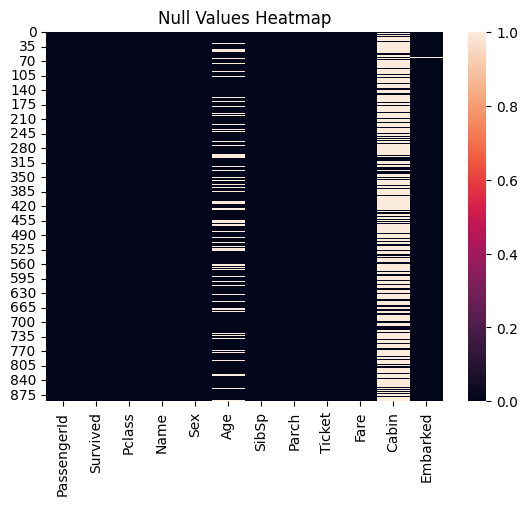

In [66]:
sns.heatmap(lab4_df.isnull(), cbar=True)
plt.title('Null Values Heatmap')
plt.show()

3.  Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. 
Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [67]:
name_split = lab4_df['Name'].str.split(', ', expand=True)
lab4_df['Lastname'] = name_split[0]
lab4_df['Firstname'] = name_split[1]

In [68]:
lab4_df = lab4_df.drop('Name', axis=1)

In [69]:
lab4_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Firstname
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F

In [70]:
lab4_df['Sex'] = lab4_df['Sex'].replace({'male': 'M', 'female': 'F'})
lab4_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Firstname
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map


Text(0.5, 1.0, 'Phân phối tuổi theo hạng hành khách')

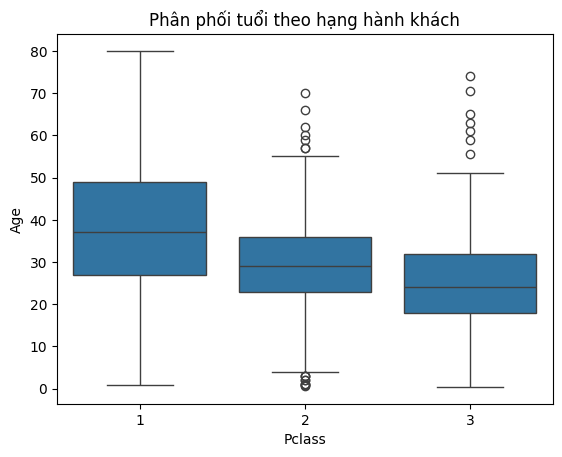

In [71]:
sns.boxplot(x='Pclass', y='Age', data=lab4_df)
plt.title('Phân phối tuổi theo hạng hành khách')

In [72]:
mean_age_per_class = lab4_df.groupby('Pclass')['Age'].mean()

In [73]:
# Thay thế giá trị thiếu trong cột Age theo từng nhóm Pclass
def fill_age(row):
    if pd.isnull(row['Age']):
        return mean_age_per_class[row['Pclass']]
    else:
        return row['Age']

lab4_df['Age'] = lab4_df.apply(fill_age, axis=1)
lab4_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Firstname
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


Text(0.5, 1.0, 'Biểu đồ Heat map của dữ liệu sau khi xử lý thiếu')

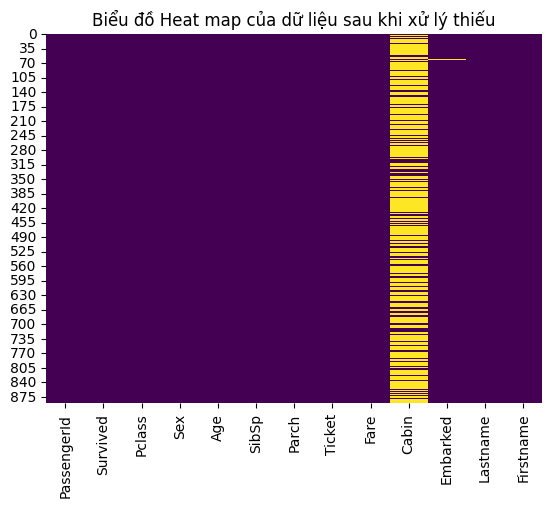

In [74]:
sns.heatmap(lab4_df.isnull(), cbar=False, cmap='viridis')
plt.title('Biểu đồ Heat map của dữ liệu sau khi xử lý thiếu')

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] -> Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [75]:
def age_group(age):
    if age <= 12:
        return 'Kid'
    elif 12 < age <= 18 :
        return 'Teen'
    elif age > 60:
        return 'Older'
    else:
        return 'Adult'

lab4_df['Agegroup'] = lab4_df['Age'].apply(age_group)


In [76]:
lab4_df[['Age', 'Agegroup']]

,Age,Agegroup
0,22.00000,Adult
1,38.00000,Adult
2,26.00000,Adult
3,35.00000,Adult
4,35.00000,Adult
...,...,...
886,27.00000,Adult
887,19.00000,Adult
888,25.14062,Adult
889,26.00000,Adult


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi 'secondName'

In [77]:
lab4_df['namePrefix'] = lab4_df['Firstname'].str.extract(r'(^\w+\.)')[0]

In [78]:
lab4_df[['Firstname', 'namePrefix']]

,Firstname,namePrefix
0,Mr. Owen Harris,Mr.
1,Mrs. John Bradley (Florence Briggs Thayer),Mrs.
2,Miss. Laina,Miss.
3,Mrs. Jacques Heath (Lily May Peel),Mrs.
4,Mr. William Henry,Mr.
...,...,...
886,Rev. Juozas,Rev.
887,Miss. Margaret Edith,Miss.
888,"Miss. Catherine Helen ""Carrie""",Miss.
889,Mr. Karl Howell,Mr.


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [79]:
lab4_df['familySize'] = 1 + lab4_df['SibSp'] + lab4_df['Parch']

In [80]:
lab4_df[['SibSp', 'Parch', 'familySize']]

,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,1,2,4
889,0,0,1


9. Tạo thêm đặc trưng 'Alone' để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [81]:
lab4_df['Alone'] = lab4_df['familySize'].apply(lambda x: 1 if x == 1 else 0)

In [82]:
lab4_df[['familySize', 'Alone']]

,familySize,Alone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1
...,...,...
886,1,1
887,1,1
888,4,0
889,1,1


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. 
Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng 'Unknown'

In [83]:
lab4_df['typeCabin'] = lab4_df['Cabin'].str[0].fillna('Unknown')

In [84]:
lab4_df[['Cabin', 'typeCabin']]

,Cabin,typeCabin
0,NaN,Unknown
1,C85,C
2,NaN,Unknown
3,C123,C
4,NaN,Unknown
...,...,...
886,NaN,Unknown
887,B42,B
888,NaN,Unknown
889,C148,C


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA
Hướng dẫn: Sinh viên cần đưa ra nhận xét sau mỗi biểu đồ trực quan nhằm rút trích được thông tin có giá trị về hành khách sống sót dựa trên các đặc trưng bên trên

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

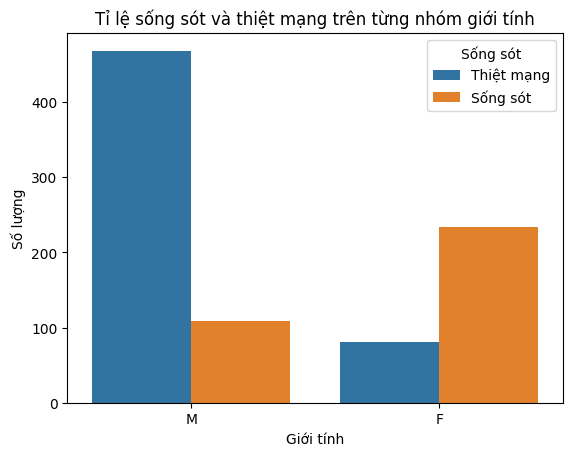

In [85]:
sns.countplot(data=lab4_df, x='Sex', hue='Survived')
plt.title('Tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(title='Sống sót', labels=['Thiệt mạng', 'Sống sót'])

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

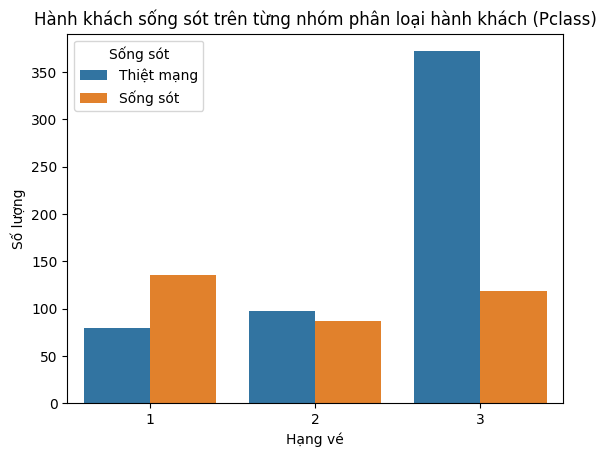

In [86]:
sns.countplot(data=lab4_df, x='Pclass', hue='Survived')
plt.title('Hành khách sống sót trên từng nhóm phân loại hành khách (Pclass)')
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng')
plt.legend(title='Sống sót', labels=['Thiệt mạng', 'Sống sót'])

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

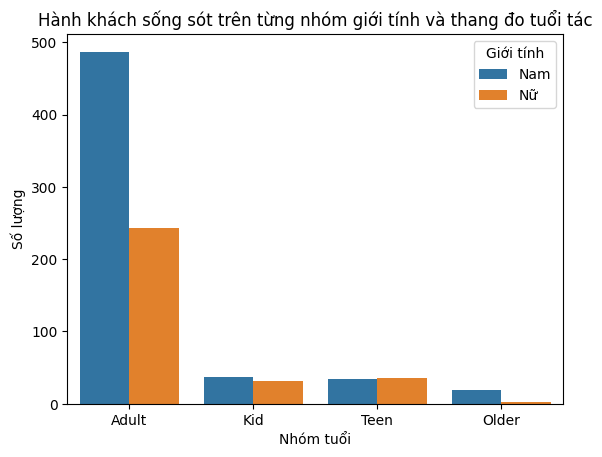

In [87]:
sns.countplot(data=lab4_df, x='Agegroup', hue='Sex')
plt.title('Hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.legend(title='Giới tính', labels=['Nam', 'Nữ'])

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

Text(0, 0.5, 'Xác suất sống sót')

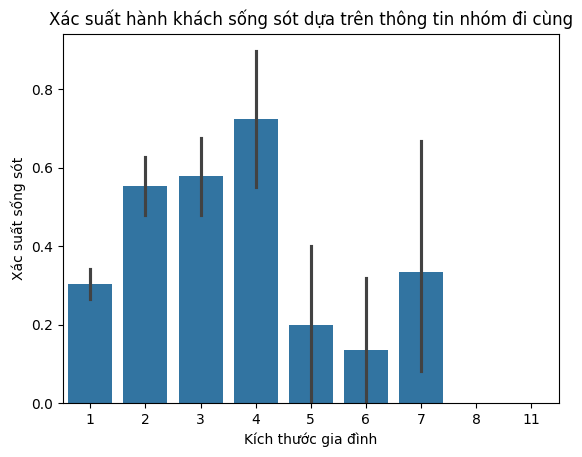

In [88]:
sns.barplot(data=lab4_df, x='familySize', y='Survived')
plt.title('Xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng')
plt.xlabel('Kích thước gia đình')
plt.ylabel('Xác suất sống sót')

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

Text(0, 0.5, 'Giá vé')

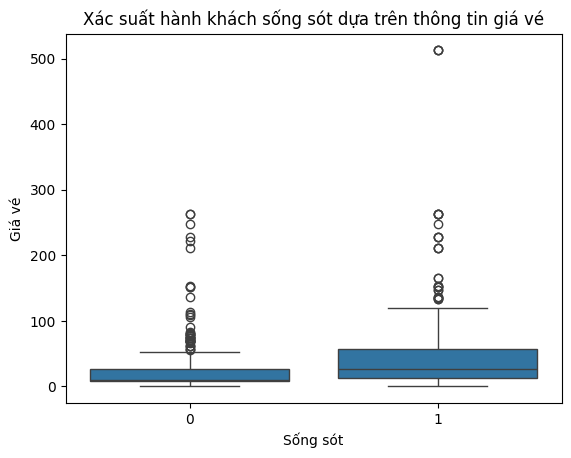

In [89]:
sns.boxplot(data=lab4_df, x='Survived', y='Fare')
plt.title('Xác suất hành khách sống sót dựa trên thông tin giá vé')
plt.xlabel('Sống sót')
plt.ylabel('Giá vé')

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến

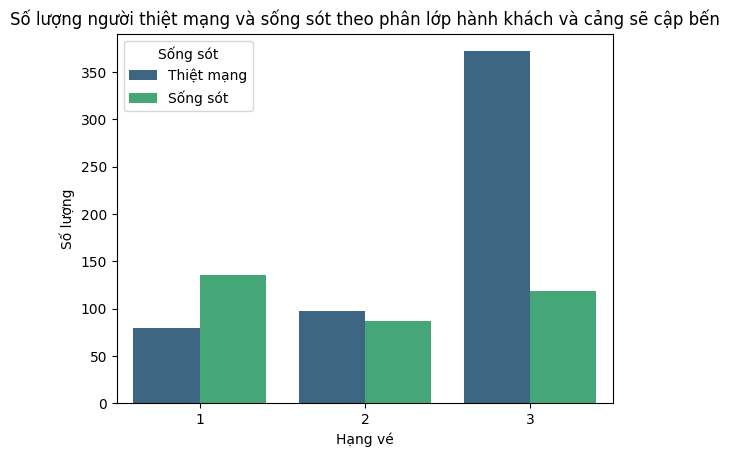

In [90]:
sns.countplot(data=lab4_df, x='Pclass', hue='Survived', palette='viridis', dodge=True)
plt.title('Số lượng người thiệt mạng và sống sót theo phân lớp hành khách và cảng sẽ cập bến')
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng')
plt.legend(title='Sống sót', labels=['Thiệt mạng', 'Sống sót'])